# STEPS : 

## Import Relevent Libraries/Modules

#### Basic EDA
    # Missing Data
    # Duplicate Data
    # Outliers or Anomalies
    # Data Visulaization
    # Feture Encoding
    # Feature Selection
    
#### Model Building
    # Seprate your Independent and Dependent data
    # Split your data into Training and Test Set
    # Model Selection
    # Model Training
    # Model Prediction
    # Model Evaluation


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

import xgboost
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

# Load the Dataset

In [2]:
df = pd.read_csv("/kaggle/input/usa-housing/USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df.shape

(5000, 7)

# Basic EDA

In [4]:
df.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [8]:
df.nunique()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms     255
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64

In [9]:
df['Avg. Area Number of Bedrooms']

0       4.09
1       3.09
2       5.13
3       3.26
4       4.23
        ... 
4995    3.46
4996    4.02
4997    2.13
4998    5.44
4999    4.07
Name: Avg. Area Number of Bedrooms, Length: 5000, dtype: float64

# Missing Data

In [10]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [11]:
df['Avg. Area Income'].skew()

-0.03371997540427538

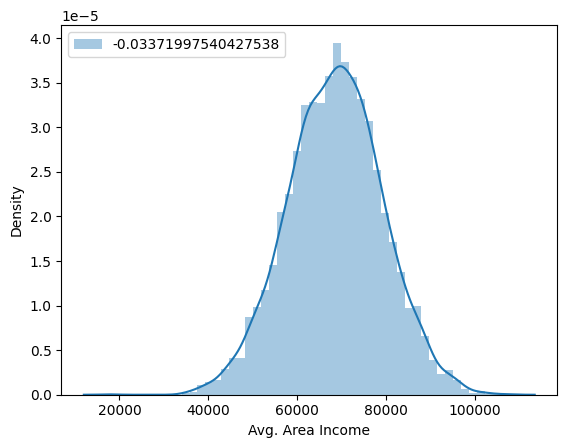

In [12]:
sns.distplot(df['Avg. Area Income'], label=df['Avg. Area Income'].skew())
plt.legend()
plt.show()

In [13]:
df['Avg. Area Income'].mean()

68583.10898395974

In [14]:
df['Avg. Area Income'].median()

68804.28640371616

In [15]:
df['Avg. Area Income'].fillna(df['Avg. Area Income'].mean(), inplace=True)

# Duplicate Data

In [16]:
df.duplicated().sum()

0

In [17]:
df[df.duplicated()]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address


In [18]:
df.drop_duplicates(keep="first", inplace=True)

# Outliers or Anomalies 

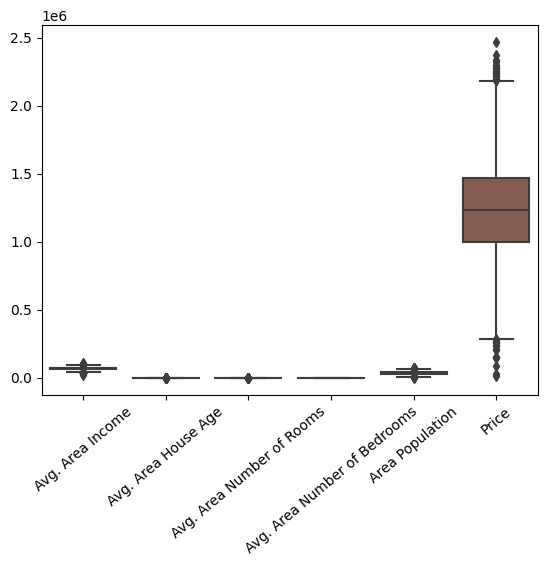

In [19]:
sns.boxplot(df)
plt.xticks(rotation=40)
plt.show()

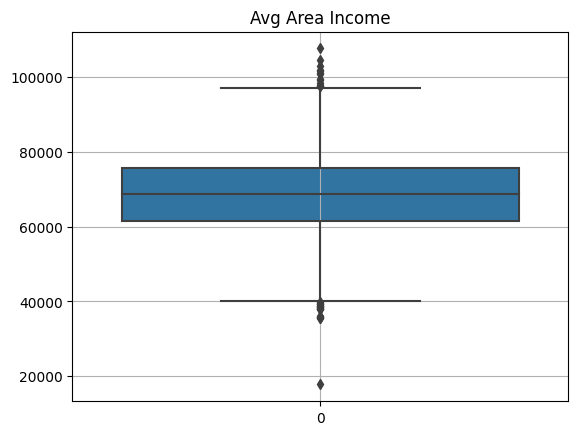

In [20]:
sns.boxplot(df['Avg. Area Income'])
plt.title('Avg Area Income')
plt.grid()
plt.show()

In [21]:
Q1 = df["Avg. Area Income"].quantile(0.25)
Q3 = df["Avg. Area Income"].quantile(0.75)

In [22]:
IQR = Q3 - Q1

In [23]:
IQR

14302.776277691672

In [24]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [25]:
lower_bound

40026.39797192346

In [26]:
upper_bound

97237.50308269015

In [27]:
df_filtered = df[(df['Avg. Area Income'] >= lower_bound) & (df['Avg. Area Income'] <= upper_bound)]


In [28]:
print(f"Q1: {Q1}, Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


Q1: 61480.562388460974, Q3: 75783.33866615265
IQR: 14302.776277691672
Lower Bound: 40026.39797192346
Upper Bound: 97237.50308269015


In [29]:
df = df_filtered

In [30]:
df.shape

(4968, 7)

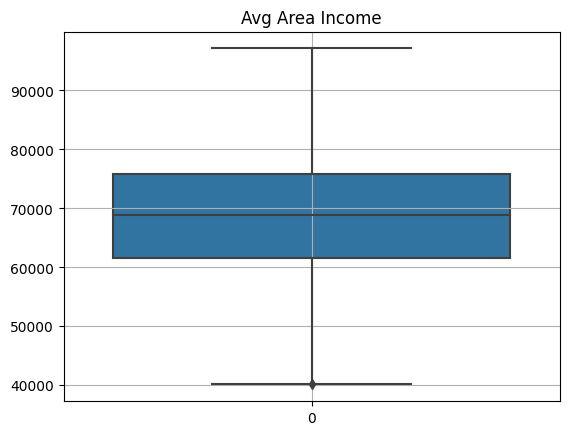

In [31]:
sns.boxplot(df['Avg. Area Income'])
plt.title("Avg Area Income")
plt.grid()
plt.show()

# Feature Encoding or Drop the column

In [32]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [33]:
df['Address']

0       208 Michael Ferry Apt. 674\nLaurabury, NE 3701...
1       188 Johnson Views Suite 079\nLake Kathleen, CA...
2       9127 Elizabeth Stravenue\nDanieltown, WI 06482...
3                               USS Barnett\nFPO AP 44820
4                              USNS Raymond\nFPO AE 09386
                              ...                        
4995                     USNS Williams\nFPO AP 30153-7653
4996                PSC 9258, Box 8489\nAPO AA 42991-3352
4997    4215 Tracy Garden Suite 076\nJoshualand, VA 01...
4998                            USS Wallace\nFPO AE 73316
4999    37778 George Ridges Apt. 509\nEast Holly, NV 2...
Name: Address, Length: 4968, dtype: object

In [34]:
df['Address'].value_counts()

Address
208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101             1
89265 Robert Haven Apt. 492\nSmithburgh, FM 58565-1105           1
PSC 7034, Box 6131\nAPO AA 05662-4293                            1
21042 Wilson Islands Suite 238\nFischerchester, MP 42425-4129    1
Unit 8831 Box 5748\nDPO AE 73012-7314                            1
                                                                ..
054 Carter Crescent Suite 674\nGlennport, WA 11140               1
8460 Kathleen Mission Apt. 482\nPort Amytown, KY 72016           1
3737 Hartman Rue\nReneestad, ID 69250-7718                       1
3465 Latoya Well\nNelsonmouth, MI 55741-4287                     1
37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595          1
Name: count, Length: 4968, dtype: int64

In [35]:
df.shape

(4968, 7)

In [36]:
df.drop(columns=['Address'], axis=1 , inplace=True)

In [37]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


# Feature Selection - Corr()

In [38]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.006309,-0.013493,0.017502,-0.010862,0.630234
Avg. Area House Age,-0.006309,1.000000,-0.008900,0.005042,-0.018827,0.455194
Avg. Area Number of Rooms,-0.013493,-0.008900,1.000000,0.463214,0.003899,0.339439
Avg. Area Number of Bedrooms,0.017502,0.005042,0.463214,1.000000,-0.021823,0.170994
Area Population,-0.010862,-0.018827,0.003899,-0.021823,1.000000,0.415309
Price,0.630234,0.455194,0.339439,0.170994,0.415309,1.000000


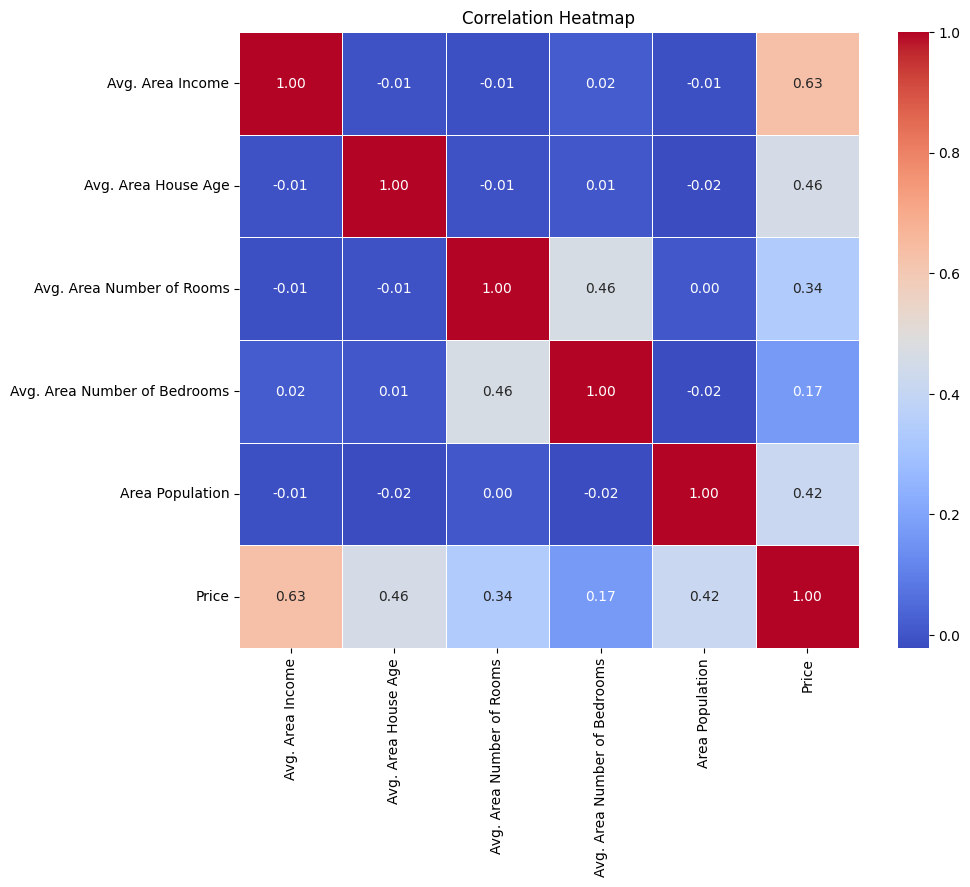

In [39]:
corr_matrix = df.corr()

# Create a heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [40]:
df.corr()['Price']

Avg. Area Income                0.630234
Avg. Area House Age             0.455194
Avg. Area Number of Rooms       0.339439
Avg. Area Number of Bedrooms    0.170994
Area Population                 0.415309
Price                           1.000000
Name: Price, dtype: float64

# Model Building using Regression Algorithms

## Seprate your Independent and Dependent Data

In [41]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [42]:
X = df.iloc[:, :-1] # Independent Variables  # X = df.drop(columns=["Price"])
y = df['Price'] # Dependent Variables

In [43]:
X[:3]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400


In [44]:
y[:3]

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
Name: Price, dtype: float64

## Split your data into Training and Test Set

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [46]:
X_train.shape

(3974, 5)

In [47]:
X_test.shape

(994, 5)

In [48]:
y_train.shape, y_test.shape

((3974,), (994,))

In [49]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1487,83403.445246,7.005353,9.404851,3.32,26319.720010
4079,57657.899557,5.391957,4.904768,3.38,35437.887014
2233,74614.824494,5.008817,5.963195,4.31,46070.443396
4128,63918.051581,5.099158,7.662942,4.26,48669.649744
82,82061.565204,4.182828,5.963032,4.10,36271.408496
...,...,...,...,...,...
4454,74584.373917,5.720482,6.414775,3.36,46372.745043
469,60509.044588,7.126075,8.527952,6.29,28410.303750
3112,88722.959535,5.864466,5.987424,4.06,29896.674174
3796,64298.651420,7.004974,7.025782,3.39,35999.975533


## Model Selection

### Using Linear Regression

In [50]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [51]:
print(f'Training Accuracy : {round(lr.score(X_train ,y_train), 2)* 100} %')
print(f'Test Accuracy : {round(lr.score(X_test ,y_test), 2)* 100} %')


Training Accuracy : 92.0 %
Test Accuracy : 91.0 %


### Using Decision Tree Regressor

In [52]:
dt = DecisionTreeRegressor(max_depth=9)
dt.fit(X_train , y_train)

DecisionTreeRegressor(max_depth=9)

In [53]:
print(f'Training Accuracy : {round(dt.score(X_train ,y_train), 2)* 100} %')
print(f'Test Accuracy : {round(dt.score(X_test ,y_test), 2)* 100} %')


Training Accuracy : 92.0 %
Test Accuracy : 77.0 %


### Using Gradient Boosting Regressor

In [54]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [55]:
print(f'Training Accuracy : {round(gbr.score(X_train ,y_train), 2)* 100} %')
print(f'Test Accuracy : {round(gbr.score(X_test ,y_test), 2)* 100} %')


Training Accuracy : 93.0 %
Test Accuracy : 90.0 %


## Model Training - Linear Regression

In [56]:
lr = LinearRegression()
lr.fit(X_train ,y_train)

LinearRegression()

## Model Prediction

In [57]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [58]:
X_train[:3]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1487,83403.445246,7.005353,9.404851,3.32,26319.720010
4079,57657.899557,5.391957,4.904768,3.38,35437.887014
2233,74614.824494,5.008817,5.963195,4.31,46070.443396


In [59]:
y_train_pred[:3]

array([1869137.31811923,  630841.88594662, 1226538.77241716])

# Slopes/Coefficients

In [60]:
X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [61]:
lr.coef_

array([2.17381405e+01, 1.66911366e+05, 1.21596266e+05, 1.84565486e+03,
       1.51062686e+01])

In [62]:
pd.DataFrame(lr.coef_, index=X.columns, columns=['Coefficients'])

,Coefficients
Avg. Area Income,21.738141
Avg. Area House Age,166911.365721
Avg. Area Number of Rooms,121596.266044
Avg. Area Number of Bedrooms,1845.654864
Area Population,15.106269


# Model Evaluation

In [63]:
# Training Data

mean_squared_error(y_train, y_train_pred)

10113812895.703907

In [64]:
np.sqrt(mean_squared_error(y_train, y_train_pred))

100567.45445572294

In [65]:
mean_absolute_error(y_train, y_train_pred)

80801.40012743932

In [66]:
r2_score(y_train , y_train_pred)

0.9174048587351101

In [67]:

def training_evaluation(actual, predicted):
    # Calculate metrics
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    
    # Print metrics
    print(f"MSE :  {mse}")
    print(f"RMSE : {rmse}")
    print(f"MAE : {mae}")
    print(f"Accuracy : {r2}")
    
    # Scatter plot with line of equality
    plt.scatter(actual, predicted, color='r')
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k', lw=3, ls='--')
    plt.title("Scatter Plot for Training Data")
    plt.xlabel("Actual Values (y_train)")
    plt.ylabel("Predicted Values (y_pred_train)")
    plt.show()


MSE :  10113812895.703907
RMSE : 100567.45445572294
MAE : 80801.40012743932
Accuracy : 0.9174048587351101


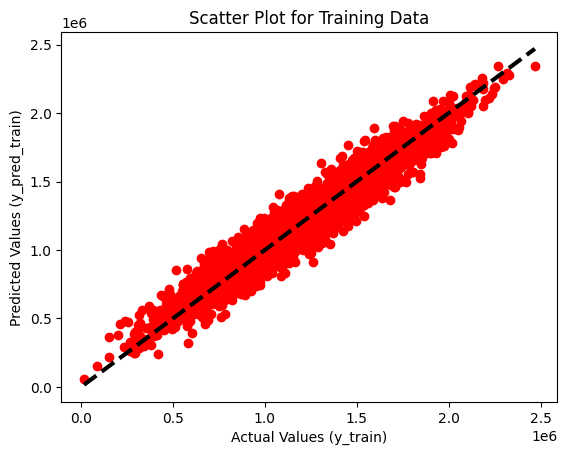

In [68]:
training_evaluation(y_train ,y_train_pred)

In [69]:
# Test Data


In [70]:

def test_evaluation(actual, predicted):
    # Calculate metrics
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    
    # Print metrics
    print(f"MSE :  {mse}")
    print(f"RMSE : {rmse}")
    print(f"MAE : {mae}")
    print(f"Accuracy : {r2}")
    
    # Scatter plot with line of equality
    plt.scatter(actual, predicted, color='r')
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k', lw=3, ls='--')
    plt.title("Scatter Plot for Test Data")
    plt.xlabel("Actual Values (y_test)")
    plt.ylabel("Predicted Values (y_pred_test)")
    plt.show()


MSE :  10400603830.477753
RMSE : 101983.35075137389
MAE : 82589.5170884984
Accuracy : 0.9133687209002822


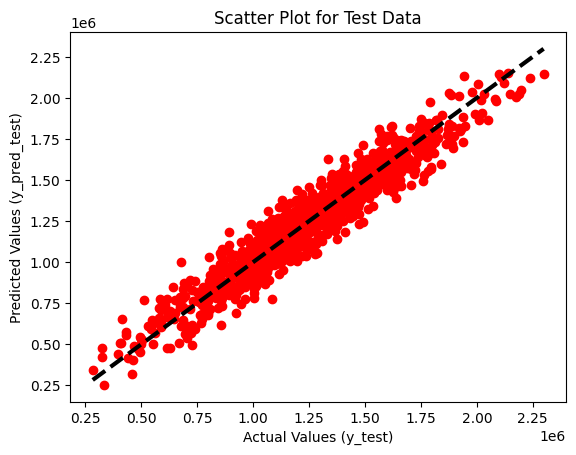

In [71]:
test_evaluation(y_test, y_test_pred)